# **Loan Prediction Project**

## **About Dataset**
### `Loan Prediction Dataset`
This dataset contains information about individuals applying for loans, including their financial and personal details. The dataset is designed to help predict whether an applicant is likely to default on a loan (indicated by the "Risk_Flag" column). The dataset includes 1,404 entries with 13 features, providing a comprehensive view of each applicant's profile.

`Features:`\
Id: Unique identifier for each applicant.\
Income: Annual income of the applicant.\
Age: Age of the applicant.\
Experience: Number of years of professional experience.\
Married/Single: Marital status of the applicant (married or single).\
House_Ownership: Housing status of the applicant (e.g., rented, owned, or no rent/no own).\
Car_Ownership: Whether the applicant owns a car (yes or no).\
Profession: The profession of the applicant (e.g., Software Developer, Mechanical Engineer, etc.).\
CITY: The city where the applicant resides.\
STATE: The state where the applicant resides.\
CURRENT_JOB_YRS: Number of years in the current job.\
CURRENT_HOUSE_YRS: Number of years in the current residence.\
Risk_Flag: Binary flag indicating whether the applicant is at risk of defaulting on the loan (1 = high risk, 0 = low risk).
`Key Insights:`\
The dataset includes a diverse range of professions, income levels, and geographic locations, making it suitable for building predictive models for loan default risk.
The "Risk_Flag" column is the target variable, which can be used to train machine learning models for classification tasks.
Features like income, age, experience, and housing status may play a significant role in determining the likelihood of loan default.
`Potential Use Cases:`\
Loan Default Prediction: Build machine learning models to predict whether an applicant is likely to default on a loan.
Risk Assessment: Analyze the factors that contribute to loan default risk.
Customer Segmentation: Segment applicants based on their financial and personal profiles for targeted marketing or risk management.
`Dataset Source:`\
The dataset is synthetic and designed for educational purposes, making it ideal for practicing data analysis, feature engineering, and machine learning model building.

`License:`\
This dataset is publicly available for educational and non-commercial use.

## 1. Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Loading Dataset

In [2]:
df = pd.read_csv(r'D:\Ideometrix\Datasets\Loan Prediction.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Observation form the Info
- No Missing Values are there in the dataset

In [4]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [5]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
df.shape
# print the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 252000
Number of columns: 13


### Encoding catagorical variables

In [7]:
# converting categorical variables to numerical variables
from sklearn.preprocessing import LabelEncoder
# Drop ID column (not useful for prediction)
df.drop(columns=['Id'], inplace=True)
#  Label Encode Binary Categorical Columns
label_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])



## Encoding Multiclass Catagorical Variables 

In [8]:
# We'll use `get_dummies` for this
multi_class_cols = ['Profession', 'CITY', 'STATE']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Optional: Convert any boolean columns to integers (0/1)
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)

# Check the result
print("Final shape after encoding:", df.shape)
print(df.head())

Final shape after encoding: (252000, 403)
    Income  Age  Experience  Married/Single  House_Ownership  Car_Ownership  \
0  1303834   23           3               1                2              0   
1  7574516   40          10               1                2              0   
2  3991815   66           4               0                2              0   
3  6256451   41           2               1                2              1   
4  5768871   47          11               1                2              0   

   CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  Profession_Analyst  ...  \
0                3                 13          0                   0  ...   
1                9                 13          0                   0  ...   
2                4                 10          0                   0  ...   
3                2                 12          1                   0  ...   
4                3                 14          1                   0  ...   

   STATE_Punjab  STA

In [15]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer,CITY_Agartala,CITY_Agra,CITY_Ahmedabad,CITY_Ahmednagar,CITY_Aizawl,CITY_Ajmer,CITY_Akola,CITY_Alappuzha,CITY_Aligarh,CITY_Allahabad,CITY_Alwar,CITY_Amaravati,CITY_Ambala,CITY_Ambarnath,CITY_Ambattur,CITY_Amravati,CITY_Amritsar,CITY_Amroha,CITY_Anand,CITY_Anantapur,CITY_Anantapuram[24],CITY_Arrah,CITY_Asansol,CITY_Aurangabad,CITY_Aurangabad[39],CITY_Avadi,CITY_Bahraich,CITY_Ballia,CITY_Bally,CITY_Bangalore,CITY_Baranagar,CITY_Barasat,CITY_Bardhaman,CITY_Bareilly,CITY_Bathinda,CITY_Begusarai,CITY_Belgaum,CITY_Bellary,CITY_Berhampore,CITY_Berhampur,CITY_Bettiah[33],CITY_Bhagalpur,CITY_Bhalswa_Jahangir_Pur,CITY_Bharatpur,CITY_Bhatpara,CITY_Bhavnagar,CITY_Bhilai,CITY_Bhilwara,CITY_Bhimavaram,CITY_Bhind,CITY_Bhiwandi,CITY_Bhiwani,CITY_Bhopal,CITY_Bhubaneswar,CITY_Bhusawal,CITY_Bidar,CITY_Bidhannagar,CITY_Bihar_Sharif,CITY_Bijapur,CITY_Bikaner,CITY_Bilaspur,CITY_Bokaro,CITY_Bongaigaon,CITY_Bulandshahr,CITY_Burhanpur,CITY_Buxar[37],CITY_Chandigarh_city,CITY_Chandrapur,CITY_Chapra,CITY_Chennai,CITY_Chinsurah,CITY_Chittoor[28],CITY_Coimbatore,CITY_Cuttack,CITY_Danapur,CITY_Darbhanga,CITY_Davanagere,CITY_Dehradun,CITY_Dehri[30],CITY_Delhi_city,CITY_Deoghar,CITY_Dewas,CITY_Dhanbad,CITY_Dharmavaram,CITY_Dhule,CITY_Dibrugarh,CITY_Dindigul,CITY_Durg,CITY_Durgapur,CITY_Eluru[25],CITY_Erode[17],CITY_Etawah,CITY_Faridabad,CITY_Farrukhabad,CITY_Fatehpur,CITY_Firozabad,CITY_Gandhidham,CITY_Gandhinagar,CITY_Gangtok,CITY_Gaya,CITY_Ghaziabad,CITY_Giridih,CITY_Gopalpur,CITY_Gorakhpur,CITY_Gudivada,CITY_Gulbarga,CITY_Guna,CITY_Guntakal,CITY_Guntur[13],CITY_Gurgaon,CITY_Guwahati,CITY_Gwalior,CITY_Hajipur[31],CITY_Haldia,CITY_Hapur,CITY_Haridwar,CITY_Hazaribagh,CITY_Hindupur,CITY_Hospet,CITY_Hosur,CITY_Howrah,CITY_Hubliâ€“Dharwad,CITY_Hyderabad,CITY_Ichalkaranji,CITY_Imphal,CITY_Indore,CITY_Jabalpur,CITY_Jaipur,CITY_Jalandhar,CITY_Jalgaon,CITY_Jalna,CITY_Jamalpur[36],CITY_Jammu[16],CITY_Jamnagar,CITY_Jamshedpur,CITY_Jaunpur,CITY_Jehanabad[38],CITY_Jhansi,CITY_Jodhpur,CITY_Jorhat,CITY_Junagadh,CITY_Kadapa[23],CITY_Kakinada,CITY_Kalyan-Dombivli,CITY_Kamarhati,CITY_Kanpur,CITY_Karaikudi,CITY_Karawal_Nagar,CITY_Karimnagar,CITY_Karnal,CITY_Katihar,CITY_Katni,CITY_Kavali,CITY_Khammam,CITY_Khandwa,CITY_Kharagpur,"CITY_Khora,_Ghaziabad",CITY_Kirari_Suleman_Nagar,CITY_Kishanganj[35],CITY_Kochi,CITY_Kolhapur,CITY_Kolkata,CITY_Kollam,CITY_Korba,CITY_Kota[6],CITY_Kottayam,CITY_Kozhikode,CITY_Kulti,CITY_Kumbakonam,CITY_Kurnool[18],CITY_Latur,CITY_Loni,CITY_Lucknow,CITY_Ludhiana,CITY_Machilipatnam,CITY_Madanapalle,CITY_Madhyamgram,CITY_Madurai,CITY_Mahbubnagar,CITY_Maheshtala,CITY_Malda,CITY_Malegaon,CITY_Mangalore,CITY_Mango,CITY_Mathura,CITY_Mau,CITY_Medininagar,CITY_

In [10]:
# show complete dataset
pd.set_option('display.max_columns', None)


## Spliting Input and Output Data

In [16]:
# spliting input and output
X = df.drop(columns=['Risk_Flag']) # Features 
y = df['Risk_Flag'] # Target variable


In [12]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer,CITY_Agartala,CITY_Agra,CITY_Ahmedabad,CITY_Ahmednagar,CITY_Aizawl,CITY_Ajmer,CITY_Akola,CITY_Alappuzha,CITY_Aligarh,CITY_Allahabad,CITY_Alwar,CITY_Amaravati,CITY_Ambala,CITY_Ambarnath,CITY_Ambattur,CITY_Amravati,CITY_Amritsar,CITY_Amroha,CITY_Anand,CITY_Anantapur,CITY_Anantapuram[24],CITY_Arrah,CITY_Asansol,CITY_Aurangabad,CITY_Aurangabad[39],CITY_Avadi,CITY_Bahraich,CITY_Ballia,CITY_Bally,CITY_Bangalore,CITY_Baranagar,CITY_Barasat,CITY_Bardhaman,CITY_Bareilly,CITY_Bathinda,CITY_Begusarai,CITY_Belgaum,CITY_Bellary,CITY_Berhampore,CITY_Berhampur,CITY_Bettiah[33],CITY_Bhagalpur,CITY_Bhalswa_Jahangir_Pur,CITY_Bharatpur,CITY_Bhatpara,CITY_Bhavnagar,CITY_Bhilai,CITY_Bhilwara,CITY_Bhimavaram,CITY_Bhind,CITY_Bhiwandi,CITY_Bhiwani,CITY_Bhopal,CITY_Bhubaneswar,CITY_Bhusawal,CITY_Bidar,CITY_Bidhannagar,CITY_Bihar_Sharif,CITY_Bijapur,CITY_Bikaner,CITY_Bilaspur,CITY_Bokaro,CITY_Bongaigaon,CITY_Bulandshahr,CITY_Burhanpur,CITY_Buxar[37],CITY_Chandigarh_city,CITY_Chandrapur,CITY_Chapra,CITY_Chennai,CITY_Chinsurah,CITY_Chittoor[28],CITY_Coimbatore,CITY_Cuttack,CITY_Danapur,CITY_Darbhanga,CITY_Davanagere,CITY_Dehradun,CITY_Dehri[30],CITY_Delhi_city,CITY_Deoghar,CITY_Dewas,CITY_Dhanbad,CITY_Dharmavaram,CITY_Dhule,CITY_Dibrugarh,CITY_Dindigul,CITY_Durg,CITY_Durgapur,CITY_Eluru[25],CITY_Erode[17],CITY_Etawah,CITY_Faridabad,CITY_Farrukhabad,CITY_Fatehpur,CITY_Firozabad,CITY_Gandhidham,CITY_Gandhinagar,CITY_Gangtok,CITY_Gaya,CITY_Ghaziabad,CITY_Giridih,CITY_Gopalpur,CITY_Gorakhpur,CITY_Gudivada,CITY_Gulbarga,CITY_Guna,CITY_Guntakal,CITY_Guntur[13],CITY_Gurgaon,CITY_Guwahati,CITY_Gwalior,CITY_Hajipur[31],CITY_Haldia,CITY_Hapur,CITY_Haridwar,CITY_Hazaribagh,CITY_Hindupur,CITY_Hospet,CITY_Hosur,CITY_Howrah,CITY_Hubliâ€“Dharwad,CITY_Hyderabad,CITY_Ichalkaranji,CITY_Imphal,CITY_Indore,CITY_Jabalpur,CITY_Jaipur,CITY_Jalandhar,CITY_Jalgaon,CITY_Jalna,CITY_Jamalpur[36],CITY_Jammu[16],CITY_Jamnagar,CITY_Jamshedpur,CITY_Jaunpur,CITY_Jehanabad[38],CITY_Jhansi,CITY_Jodhpur,CITY_Jorhat,CITY_Junagadh,CITY_Kadapa[23],CITY_Kakinada,CITY_Kalyan-Dombivli,CITY_Kamarhati,CITY_Kanpur,CITY_Karaikudi,CITY_Karawal_Nagar,CITY_Karimnagar,CITY_Karnal,CITY_Katihar,CITY_Katni,CITY_Kavali,CITY_Khammam,CITY_Khandwa,CITY_Kharagpur,"CITY_Khora,_Ghaziabad",CITY_Kirari_Suleman_Nagar,CITY_Kishanganj[35],CITY_Kochi,CITY_Kolhapur,CITY_Kolkata,CITY_Kollam,CITY_Korba,CITY_Kota[6],CITY_Kottayam,CITY_Kozhikode,CITY_Kulti,CITY_Kumbakonam,CITY_Kurnool[18],CITY_Latur,CITY_Loni,CITY_Lucknow,CITY_Ludhiana,CITY_Machilipatnam,CITY_Madanapalle,CITY_Madhyamgram,CITY_Madurai,CITY_Mahbubnagar,CITY_Maheshtala,CITY_Malda,CITY_Malegaon,CITY_Mangalore,CITY_Mango,CITY_Mathura,CITY_Mau,CITY_Medininagar,CITY_Meerut,CIT

In [13]:
# print sum of unique values in output 
print(y.value_counts())



Risk_Flag
0    221004
1     30996
Name: count, dtype: int64


## Data Imbalance 
- the number of classes in out put column are not equal

In [14]:
# balancing the dataset
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the original class distribution
print("Original class distribution:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("New class distribution after SMOTE:", Counter(y_resampled))




Original class distribution: Counter({0: 221004, 1: 30996})
New class distribution after SMOTE: Counter({0: 221004, 1: 221004})


In [17]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Check the shapes of the training and testing sets 

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
# Check the class distribution in the training set
print("Class distribution in training set:", Counter(y_train))
print("Class distribution in testing set:", Counter(y_test))


X_train shape: (353606, 402)
y_train shape: (353606,)
X_test shape: (88402, 402)
y_test shape: (88402,)
Class distribution in training set: Counter({1: 176925, 0: 176681})
Class distribution in testing set: Counter({0: 44323, 1: 44079})


# **Feature Scalling Process**
    - Standardization
    - Normalization

## Standardization

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# changing into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
# Check the first few rows of the scaled data

X_test_scaled.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer,CITY_Agartala,CITY_Agra,CITY_Ahmedabad,CITY_Ahmednagar,CITY_Aizawl,CITY_Ajmer,CITY_Akola,CITY_Alappuzha,CITY_Aligarh,CITY_Allahabad,CITY_Alwar,CITY_Amaravati,CITY_Ambala,CITY_Ambarnath,CITY_Ambattur,CITY_Amravati,CITY_Amritsar,CITY_Amroha,CITY_Anand,CITY_Anantapur,CITY_Anantapuram[24],CITY_Arrah,CITY_Asansol,CITY_Aurangabad,CITY_Aurangabad[39],CITY_Avadi,CITY_Bahraich,CITY_Ballia,CITY_Bally,CITY_Bangalore,CITY_Baranagar,CITY_Barasat,CITY_Bardhaman,CITY_Bareilly,CITY_Bathinda,CITY_Begusarai,CITY_Belgaum,CITY_Bellary,CITY_Berhampore,CITY_Berhampur,CITY_Bettiah[33],CITY_Bhagalpur,CITY_Bhalswa_Jahangir_Pur,CITY_Bharatpur,CITY_Bhatpara,CITY_Bhavnagar,CITY_Bhilai,CITY_Bhilwara,CITY_Bhimavaram,CITY_Bhind,CITY_Bhiwandi,CITY_Bhiwani,CITY_Bhopal,CITY_Bhubaneswar,CITY_Bhusawal,CITY_Bidar,CITY_Bidhannagar,CITY_Bihar_Sharif,CITY_Bijapur,CITY_Bikaner,CITY_Bilaspur,CITY_Bokaro,CITY_Bongaigaon,CITY_Bulandshahr,CITY_Burhanpur,CITY_Buxar[37],CITY_Chandigarh_city,CITY_Chandrapur,CITY_Chapra,CITY_Chennai,CITY_Chinsurah,CITY_Chittoor[28],CITY_Coimbatore,CITY_Cuttack,CITY_Danapur,CITY_Darbhanga,CITY_Davanagere,CITY_Dehradun,CITY_Dehri[30],CITY_Delhi_city,CITY_Deoghar,CITY_Dewas,CITY_Dhanbad,CITY_Dharmavaram,CITY_Dhule,CITY_Dibrugarh,CITY_Dindigul,CITY_Durg,CITY_Durgapur,CITY_Eluru[25],CITY_Erode[17],CITY_Etawah,CITY_Faridabad,CITY_Farrukhabad,CITY_Fatehpur,CITY_Firozabad,CITY_Gandhidham,CITY_Gandhinagar,CITY_Gangtok,CITY_Gaya,CITY_Ghaziabad,CITY_Giridih,CITY_Gopalpur,CITY_Gorakhpur,CITY_Gudivada,CITY_Gulbarga,CITY_Guna,CITY_Guntakal,CITY_Guntur[13],CITY_Gurgaon,CITY_Guwahati,CITY_Gwalior,CITY_Hajipur[31],CITY_Haldia,CITY_Hapur,CITY_Haridwar,CITY_Hazaribagh,CITY_Hindupur,CITY_Hospet,CITY_Hosur,CITY_Howrah,CITY_Hubliâ€“Dharwad,CITY_Hyderabad,CITY_Ichalkaranji,CITY_Imphal,CITY_Indore,CITY_Jabalpur,CITY_Jaipur,CITY_Jalandhar,CITY_Jalgaon,CITY_Jalna,CITY_Jamalpur[36],CITY_Jammu[16],CITY_Jamnagar,CITY_Jamshedpur,CITY_Jaunpur,CITY_Jehanabad[38],CITY_Jhansi,CITY_Jodhpur,CITY_Jorhat,CITY_Junagadh,CITY_Kadapa[23],CITY_Kakinada,CITY_Kalyan-Dombivli,CITY_Kamarhati,CITY_Kanpur,CITY_Karaikudi,CITY_Karawal_Nagar,CITY_Karimnagar,CITY_Karnal,CITY_Katihar,CITY_Katni,CITY_Kavali,CITY_Khammam,CITY_Khandwa,CITY_Kharagpur,"CITY_Khora,_Ghaziabad",CITY_Kirari_Suleman_Nagar,CITY_Kishanganj[35],CITY_Kochi,CITY_Kolhapur,CITY_Kolkata,CITY_Kollam,CITY_Korba,CITY_Kota[6],CITY_Kottayam,CITY_Kozhikode,CITY_Kulti,CITY_Kumbakonam,CITY_Kurnool[18],CITY_Latur,CITY_Loni,CITY_Lucknow,CITY_Ludhiana,CITY_Machilipatnam,CITY_Madanapalle,CITY_Madhyamgram,CITY_Madurai,CITY_Mahbubnagar,CITY_Maheshtala,CITY_Malda,CITY_Malegaon,CITY_Mangalore,CITY_Mango,CITY_Mathura,CITY_Mau,CITY_Medininagar,CITY_Meerut,CIT

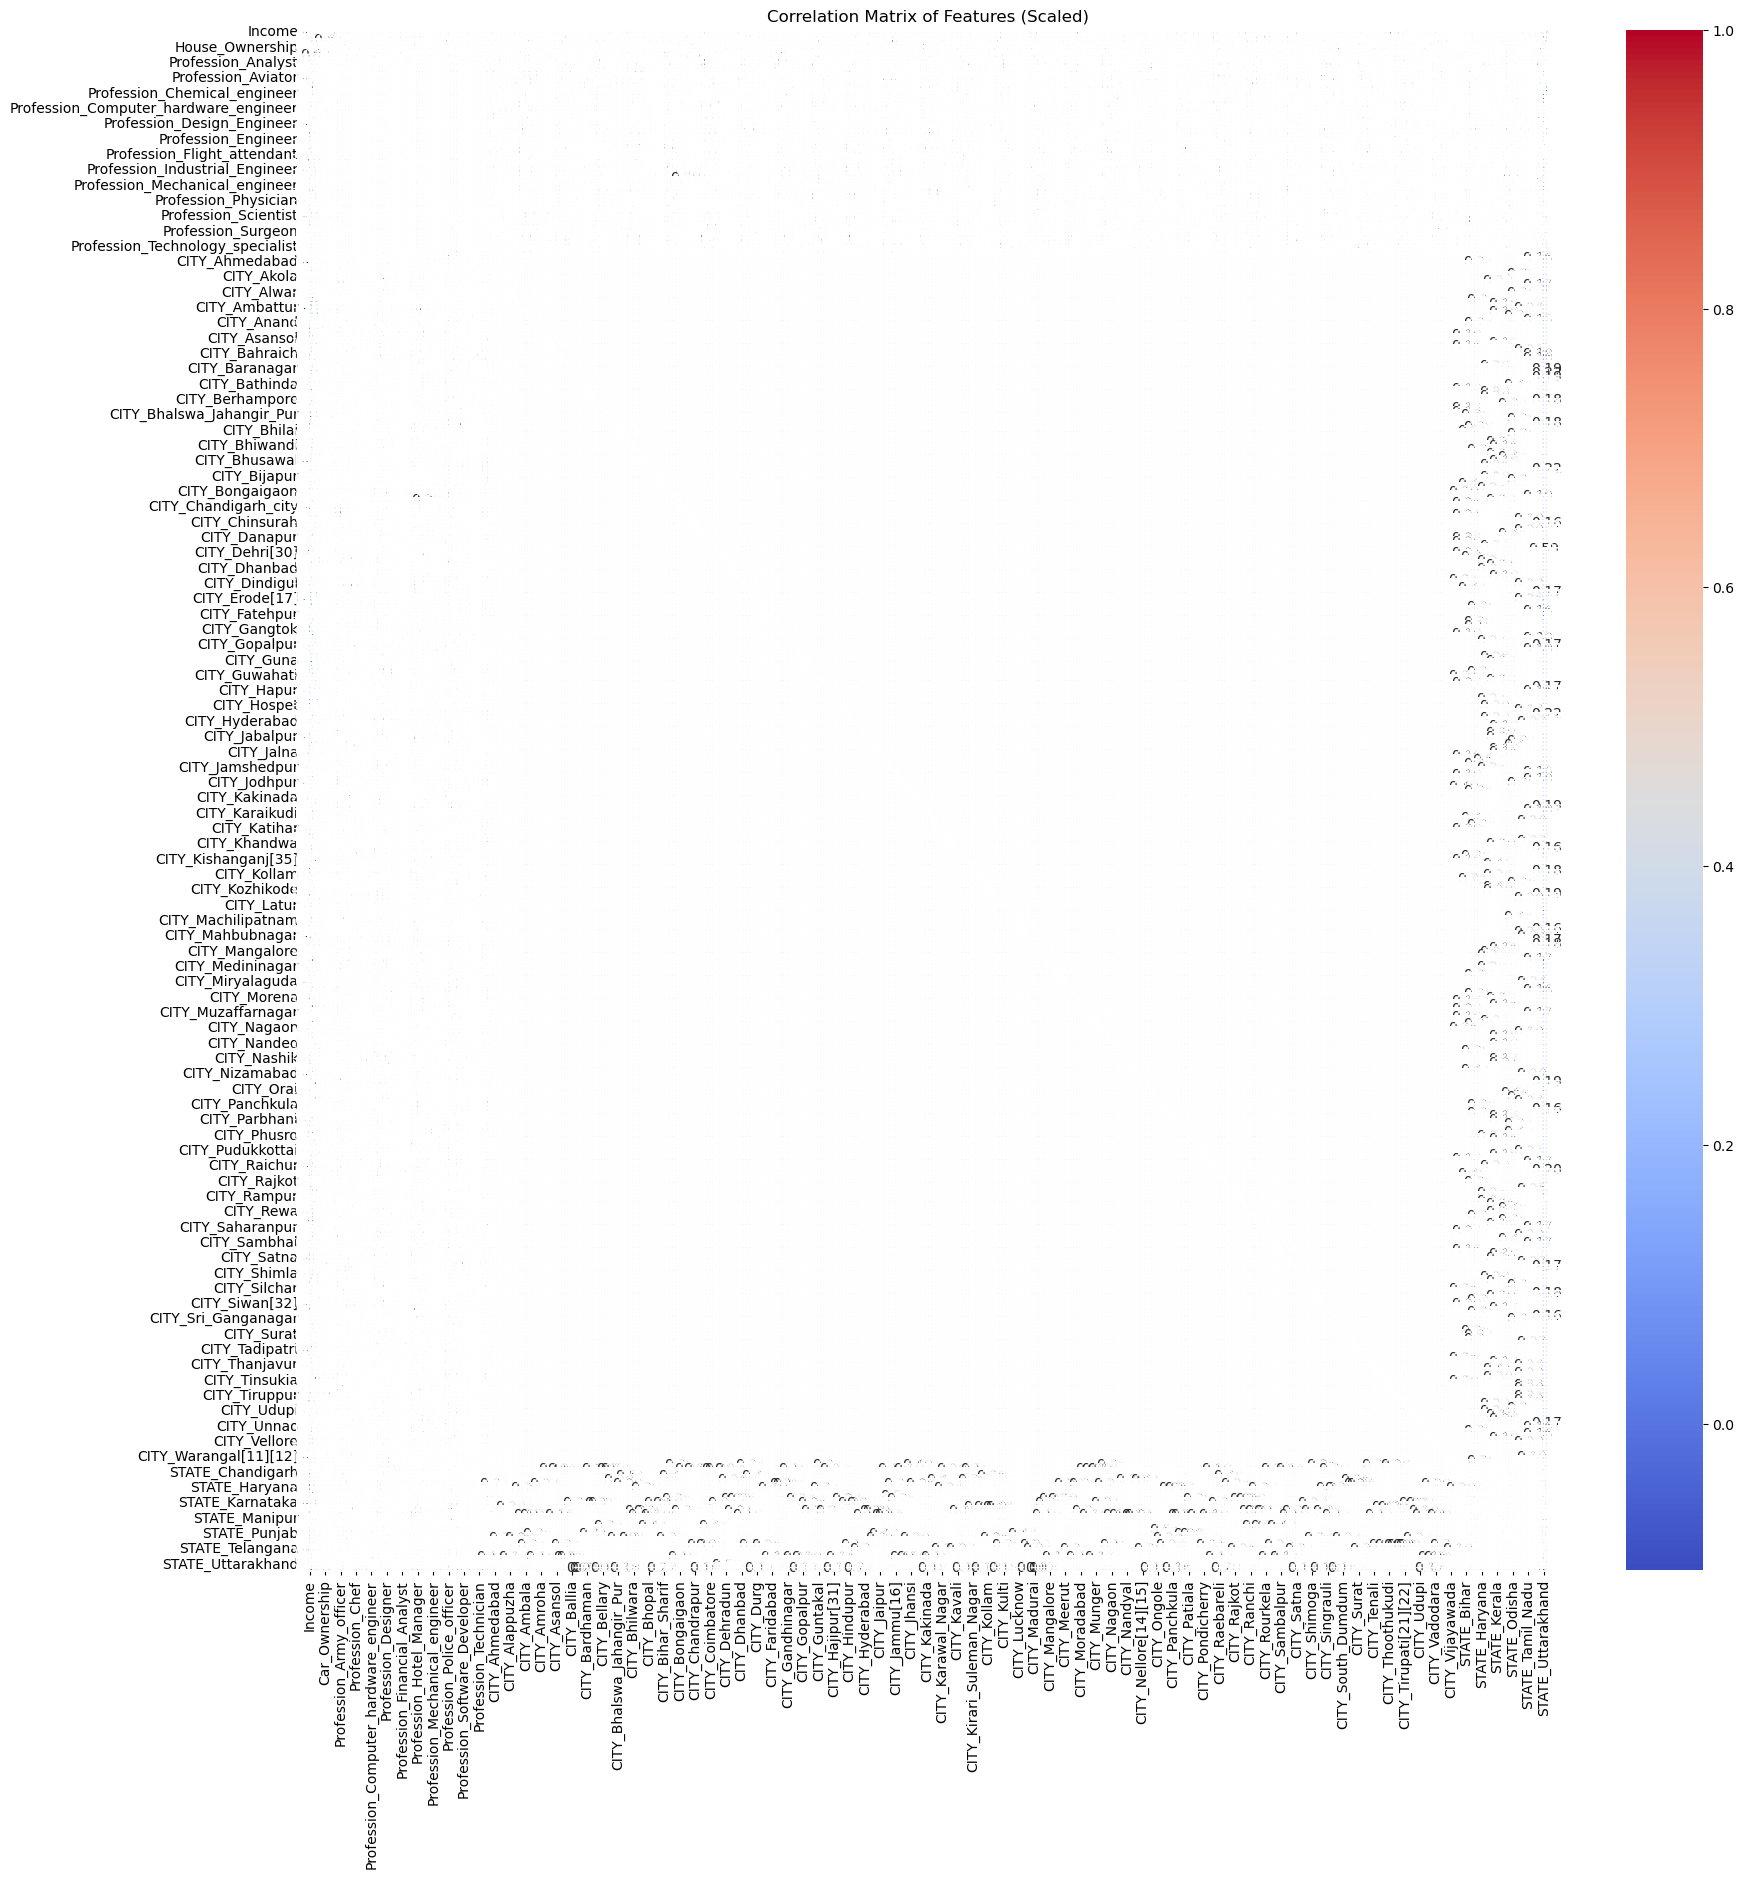

In [20]:
# visualize correlation matrix balanced dataset after scalling

plt.figure(figsize=(20, 20))
sns.heatmap(X_train_scaled.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features (Scaled)')
plt.show()



<Axes: xlabel='Risk_Flag', ylabel='Age'>

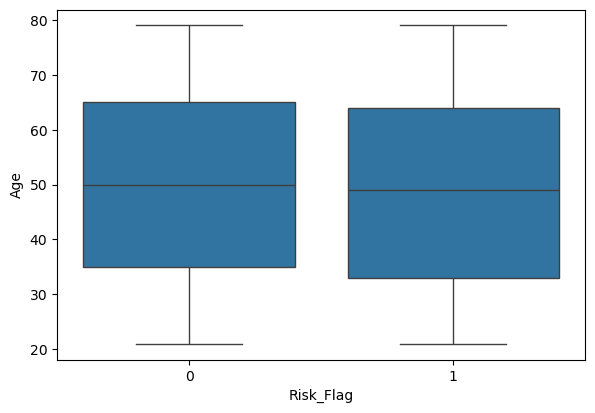

In [24]:
# plotting the values of key features vs target variable(Risk_Flag) in balanced dataset after scaling
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Risk_Flag', y='Age', data=df)





In [25]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (353606, 402)
y_train shape: (353606,)


## Training a RandomForest Model


In [31]:
# Traing the model
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_classifier.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)
# Check the first few predictions
print("First few predictions:", y_pred[:10])
# Check the first few actual values
print("First few actual values:", y_test.values[:10])

First few predictions: [0 0 1 0 0 0 1 1 1 1]
First few actual values: [0 0 1 0 0 0 0 0 1 1]


Accuracy: 0.9396054387909776
Confusion Matrix:
 [[40374  3949]
 [ 1390 42689]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     44323
           1       0.92      0.97      0.94     44079

    accuracy                           0.94     88402
   macro avg       0.94      0.94      0.94     88402
weighted avg       0.94      0.94      0.94     88402



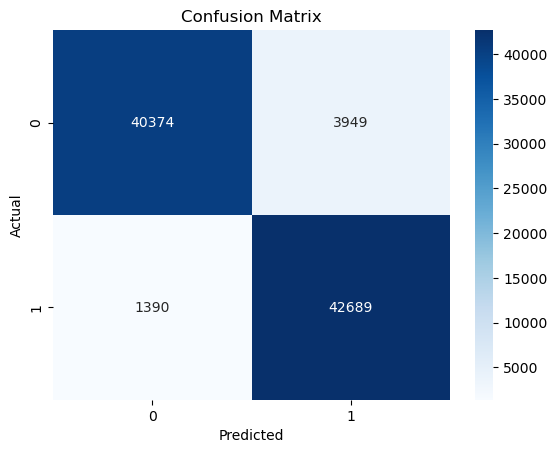

In [32]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
# Plot confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
#accuracy score of the model in percentage
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 93.96%
